In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df_base = pd.read_csv("../data/cifar_10C_resnet_2023_04_24-11_01_31_AM.csv", header=None)
df_mixup = pd.read_csv("../data/cifar_10C_resnet_mixup_2023_04_24-01_15_36_PM.csv", header=None)

In [3]:
def func(df):
    index = []
    for i, row in df.iterrows():
        arr_row = row.to_numpy()
        arr_row = [int(re.findall(r'\d+',str(x))[0]) for x in arr_row]
        target = arr_row[0]
        for idx, i in enumerate(reversed(arr_row[1:])):
            if target == i:
                continue
            elif target != i and idx == 0:
                index.append(260)
                break
            elif target != i:
                index.append(len(arr_row)-idx-1)
                break
    return index

In [4]:
df_base_converted = func(df_base)
df_mixup_converted = func(df_mixup)

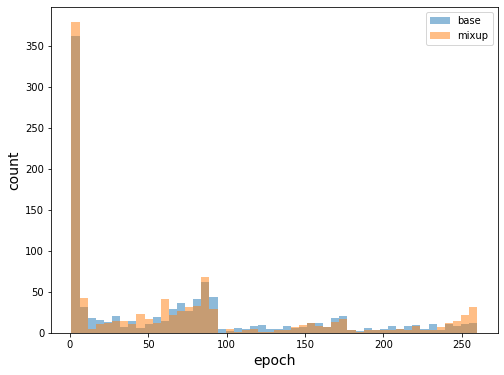

In [5]:
plt.figure(figsize=(8,6))
plt.hist(df_base_converted, bins=50, alpha=0.5, label="base")
plt.hist(df_mixup_converted, bins=50, alpha=0.5, label="mixup")

plt.xlabel("epoch", size=14)
plt.ylabel("count", size=14)
plt.legend(loc='upper right')
plt.savefig("cifar10-eh.png")

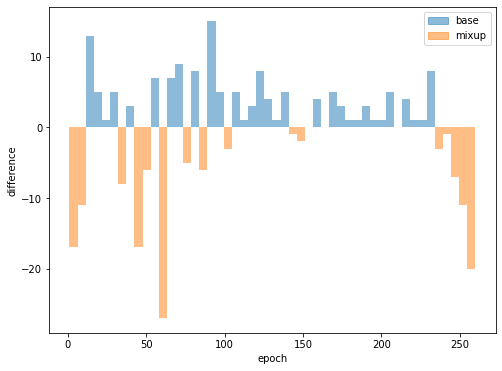

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_base_converted and df_mixup_converted are NumPy arrays or Pandas Series

# Calculate the histograms for the two datasets
hist_base, bins_base = np.histogram(df_base_converted, bins=50)
hist_mixup, bins_mixup = np.histogram(df_mixup_converted, bins=50)

# Calculate the bin centers for the histograms
bin_centers_base = (bins_base[:-1] + bins_base[1:]) / 2
bin_centers_mixup = (bins_mixup[:-1] + bins_mixup[1:]) / 2

# Calculate the difference between the two histograms
hist_difference = hist_base - hist_mixup

# Create a new figure for the difference plot
plt.figure(figsize=(8, 6))

# Set the color of each bar based on its sign (positive or negative)
bar_colors = ['tab:blue' if val >= 0 else 'tab:orange' for val in hist_difference]

# Plot the difference histogram with the colored bars
plt.bar(bin_centers_base, hist_difference, width=(bins_base[1] - bins_base[0]), color=bar_colors, alpha=0.5)

# Optionally, you can add labels, titles, and legends
plt.xlabel("epoch")
plt.ylabel("difference")
import matplotlib.patches as mpatches

# Create legend patches for red and blue colors
red_patch = mpatches.Patch(color='tab:blue', label='base', alpha=0.5)
blue_patch = mpatches.Patch(color='tab:orange', label='mixup', alpha=0.5)

# Add the legend with the custom patches
plt.legend(handles=[red_patch, blue_patch])

# Display the plot
plt.savefig("cifar10-eh-diff.png")
plt.show()


In [71]:
df_base_phases = []
for i in df_base_converted:
    if (i >= 0) and (i <= 90):
        df_base_phases.append(1)
    elif (i > 90) and (i <= 175):
        df_base_phases.append(2)
    elif (i > 175) and (i < 260):
        df_base_phases.append(3)

df_mixup_phases = []
for i in df_mixup_converted:
    if (i >= 0) and (i <= 90):
        df_mixup_phases.append(1)
    elif (i > 90) and (i <= 175):
        df_mixup_phases.append(2)
    elif (i > 175) and (i < 260):
        df_mixup_phases.append(3)

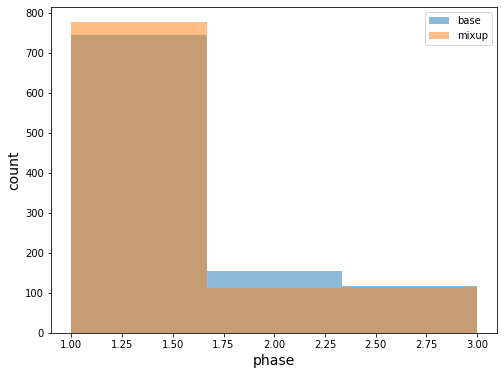

In [79]:
plt.figure(figsize=(8,6))
plt.hist(df_base_phases, bins=3, alpha=0.5, label="base")
plt.hist(df_mixup_phases, bins=3, alpha=0.5, label="mixup")

plt.xlabel("phase", size=14)
plt.ylabel("count", size=14)
plt.legend(loc='upper right')
plt.savefig("ciraf10=eh-ph.png")

In [73]:
print("base phase 1:", df_base_phases.count(1))
print("mixup phase 1:", df_mixup_phases.count(1))

print("base phase 2:", df_base_phases.count(2))
print("mixup phase 2:", df_mixup_phases.count(2))

print("base phase 3:", df_base_phases.count(3))
print("mixup phase 3:", df_mixup_phases.count(3))

base phase 1: 744
mixup phase 1: 776
base phase 2: 154
mixup phase 2: 111
base phase 3: 116
mixup phase 3: 115


In [74]:
df_base_phases_pre = []
for i in df_base_converted:
    if (i >= 0) and (i <= 34):
        df_base_phases_pre.append(1)

df_mixup_phases_pre = []
for i in df_mixup_converted:
    if (i >= 0) and (i <= 34):
        df_mixup_phases_pre.append(1)

In [75]:
print("base phase 1:", df_base_phases_pre.count(1))
print("mixup phase 1:", df_mixup_phases_pre.count(1))

base phase 1: 463
mixup phase 1: 475


In [76]:
print(475*100/463 - 100)

2.5917926565874723


In [66]:
print(145*100/118 - 100)

22.88135593220339


In [29]:
df_base_converted_filltered = []
for i in df_base_converted:
    if i == 260:
        continue
    df_base_converted_filltered.append(i)

df_mixup_converted_filltered = []
for i in df_mixup_converted:
    if i == 260:
        continue
    df_mixup_converted_filltered.append(i)

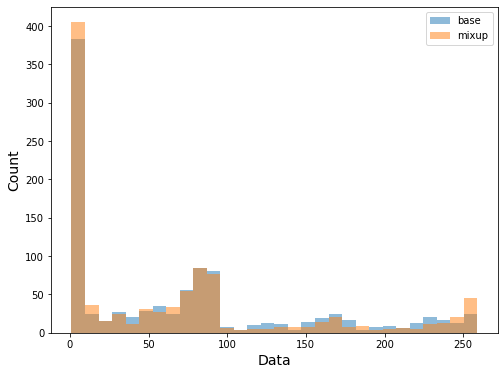

In [34]:
plt.figure(figsize=(8,6))
plt.hist(df_base_converted_filltered, bins=30, alpha=0.5, label="base")
plt.hist(df_mixup_converted_filltered, bins=30, alpha=0.5, label="mixup")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.savefig("test_2.png")

## Examples

In [26]:
import sys
sys.path.append("..")
from src.datamodules.cifar10_datamodule import CIFAR10DataModule

In [36]:
module = CIFAR10DataModule()
module.prepare_data()
module.setup()
loader = module.train_set_subset_dataloader()

Files already downloaded and verified


In [33]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [59]:
easy_i, hard_i = [], []
for i, (mixup_m, base_m) in enumerate(zip(mixup_mean, base_mean)):
    if mixup_m < 50 and base_m < 50:
        easy_i.append(i)

    if mixup_m > 150 and base_m > 150:
        hard_i.append(i)

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(loader)
images, labels = next(dataiter)


In [ ]:
# EASY Examples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


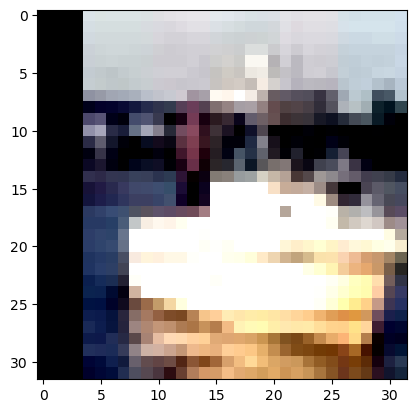

tensor(8)
1.6666666666666667
2.3333333333333335


In [63]:
# show images
i = easy_i[0]
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


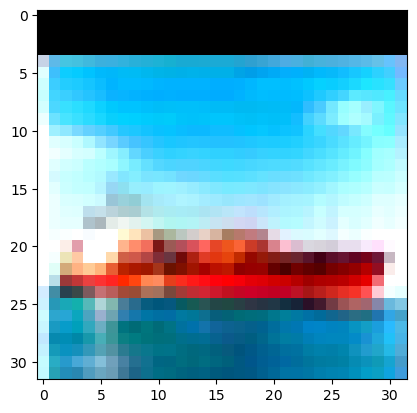

tensor(8)
1.6666666666666667
1.0


In [85]:
# show images
i = easy_i[4]
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


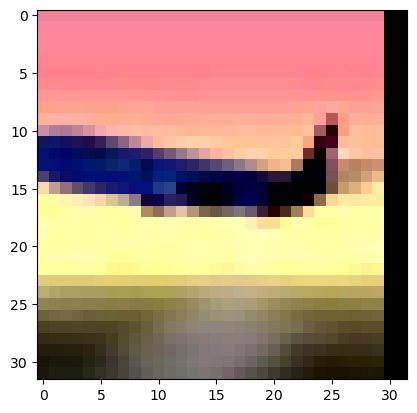

tensor(0)
44.0
36.666666666666664


In [102]:
# show images
i = easy_i[10]
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


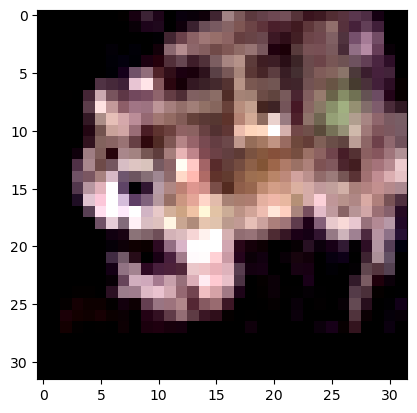

tensor(6)
29.0
9.666666666666666


In [84]:
# show images
i = easy_i[2]
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

In [ ]:
# HARD Examples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


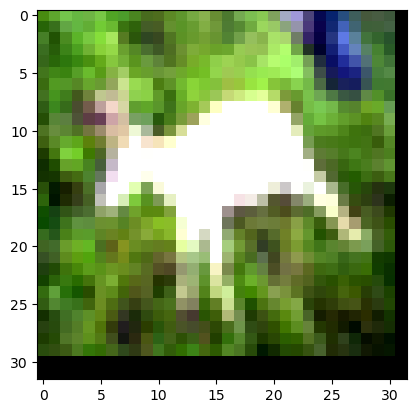

tensor(4)
183.66666666666666
190.33333333333334


In [81]:
# show images
i = hard_i[2]
print(i)
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


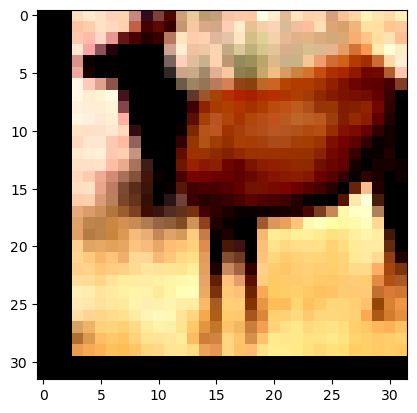

tensor(4)
199.33333333333334
197.66666666666666


In [82]:
# show images
i = hard_i[3]
print(i)
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11


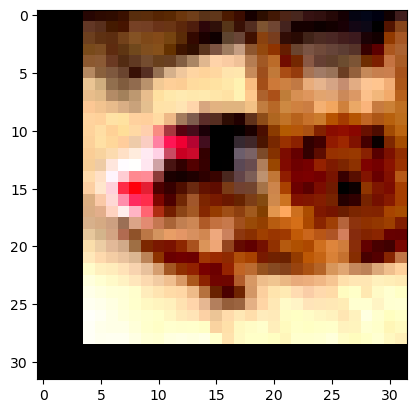

tensor(5)
191.33333333333334
198.66666666666666


In [83]:
# show images
i = hard_i[4]
print(i)
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


28


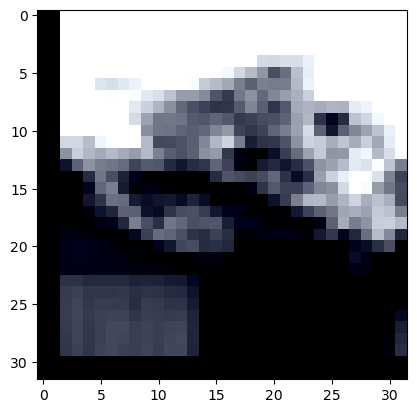

tensor(3)
197.0
198.66666666666666


In [79]:
# show images
i = hard_i[10]
print(i)
imshow(torchvision.utils.make_grid(images[i]))
print(labels[i])
print(base_mean[i])
print(mixup_mean[i])

Next steps:
    cifar 100
    nlp

